**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/Python/clases/3_algebra_lineal/0_definiciones_generales.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/python3) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


## Lo siguiente está basado en el capítulo 2 y apéndice del libro de texto de J. Kiusalaas "Numerical Methods in Engineering with Python 3" y el libro de "Álgebra Lineal" de S. Grossman y J. Flores.

**Se sugiere haber revisado la sección 1.5 del libro de texto de J. Kiusalaas "Numerical Methods in Engineering with Python 3": uso de numpy**

**Nota: los ejercicios solicitados en esta nota deben realizarlos o en papel o creando notebooks de jupyterlab.**

# Vectores

## Vector renglón de $n$ componentes 

Un vector de $n$ componentes se define como un conjunto **ordenado** de $n$ números escritos de la siguiente forma: $(x_1, x_2, \dots, x_n)$

Podemos usar una tupla para construir un vector

## Vector columna  de $n$ componentes 

Un vector columna de $n$ componentes es un conjunto **ordenado** de $n$ números escritos de la siguiente forma: 
$\left( 
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}
\right)$

**Obs:** $x_k$ se denomina la **k-ésima** componente del vector y puede estar en algún conjunto de números como $\mathbb{R}$ (reales) o $\mathbb{C}$ (complejos). Típicamente si no se especifica el conjunto se supone $\mathbb{R}$.

Los vectores renglón se encuentran en el conjunto $\mathbb{R}^{1xn}$ y los vectores columna se encuentran en el conjunto $\mathbb{R}^{nx1}$ o simplemente $\mathbb{R}^n$.

### En numpy...

**En numpy creamos array's de la siguiente forma: (un array en numpy se considera tanto columna o renglón y dependiendo del uso se toma uno u otro)**

In [3]:
import numpy as np
import pprint

In [2]:
v = np.array([1,2,3])
v

array([1, 2, 3])

In [3]:
w = np.array([1,2,3], dtype='float')
w

array([1., 2., 3.])

**y cada array tiene atributos `ndim` (número de dimensiones), `shape` (tamaño de cada dimensión) y `size` (el tamaño total del array) y `dtype` el tipo de dato del array**

In [3]:
print('v.ndim:', v.ndim)
print('v.shape:', v.shape)
print('v.size:', v.size)
print('v.dtype', v.dtype)

v.ndim: 1
v.shape: (3,)
v.size: 3
v.dtype int64


**accedemos con corchetes a sus componentes**

In [4]:
print('primer elemento', v[0])
print('último elemento', v[-1])
print('segundo elemento', v[1])
print('penúltimo elemento', v[-2])
print('del primero al 2º elemento incluyendo este último', v[:2])
print('del 2º al último elemento sin incluir el 2º', v[2:])

primer elemento 1
último elemento 3
segundo elemento 2
penúltimo elemento 2
del primero al 2º elemento incluyendo este último [1 2]
del 2º al último elemento sin incluir el 2º [3]


In [5]:
v_2 = np.arange(10)

In [6]:
v_2[1:10:2]

array([1, 3, 5, 7, 9])

**otra forma de generar arrays en numpy es con la función arange o random para un array pseudo aleatorio:**

In [5]:
pprint.pprint(np.arange(5))
pprint.pprint(np.arange(0,1,.2))

array([0, 1, 2, 3, 4])
array([0. , 0.2, 0.4, 0.6, 0.8])


In [6]:
#array pseudo aleatorio
np.random.seed(1989)
pprint.pprint(np.random.randint(5, size=3)) #números enteros pseudo aleatorios del 0 al 4

array([2, 4, 4])


La semilla es una valor un tanto arbitrario que te ayuda para estandarizar el uso de 'random'

ver: 
* [numpy.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
* [numpy.random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)
* [numpy-for-matlab-users](https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html)

**Para obtener vectores renglón se puede utilizar la función `reshape`**

In [7]:
v.reshape(1,3)

array([[1, 2, 3]])

**y vectores columna con:**

In [8]:
v.reshape(3,1)

array([[1],
       [2],
       [3]])

ver: [numpy.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

Sin embargo hay que considerar que no es del todo necesario convertir los vectores renglón en columna ya que en las operaciones podremos usar 'renglones'

Hay que notar que el 'reshape' nos está anidando la lista para darnos 2 dimensiones con valores distintos de cero

# Matrices

El arreglo de coeficientes: $$A=\begin{bmatrix} a_{11} & a_{12} & \cdots& a_{1n} \\ a_{21} & a_{22} & \cdots& a_{2n} \\ &&\vdots \\ a_{m1} & a_{m2} & \cdots& a_{mn} \end{bmatrix}$$ 

se le nombra matriz de $mxn$. En caso que se tenga un sistema de la forma $Ax=b$ con $b$ vector de constantes conocidas, se le nombra matriz de coeficientes del sistema y al vector $b$ se le nombra lado derecho; la matriz de coeficientes aumentada con el lado derecho se le nombra matriz aumentada: $$ [A|b] = \left [\begin{array}{cccc|c} a_{11} & a_{12} & \cdots& a_{1n} & b_1 \\ a_{21} & a_{22} & \cdots& a_{2n} & b_2 \\ && \vdots& & \\ a_{m1} & a_{m2} & \cdots& a_{mn} & b_m \end{array} \right ]$$

**Def** Formalmente un escalar es un número real o complejo y una matriz es un arreglo rectangular de escalares y se escribe $A \in \mathbb{R}^{mxn}$ o $A \in \mathbb{C}^{mxn}$ para denotar que $A$ es un arreglo de dos dimensiones de números reales o de números complejos respectivamente y $A$ tiene dimensiones $mxn$: $m$ renglones y $n$ columnas.

Una matriz se nombra cuadrada si $m=n$ y rectangular si $m \neq n$.

**Def** Una submatriz de una matriz $A$ es un arreglo que se forma al eliminar cualquier combinación de renglones y columnas de $A$. Por ejemplo, $B = \begin{bmatrix} 2 &4 \\ -3& 7\end{bmatrix}$ es una submatriz de $A = \begin{bmatrix} 2 &1& 3& 4 \\ 8& 6& 5& -9\\ -3& 8& 3& 7 \end{bmatrix}$.

El símbolo $A_{i*}$ es utilizado para denotar el $i$-ésimo renglón de $A$ y $A_{*j}$ la $j$-ésima columna de A. Por ejemplo $A_{2*} = \begin{bmatrix} 8& 6& 5& -9 \end{bmatrix}$ y $A_{*2} = \begin{bmatrix} 1 \\6\\8 \end{bmatrix}$ en la definición anterior.

### En numpy...

**En numpy creamos arrays de dos dimensiones de la siguiente forma:**

In [9]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

**y cada array tiene atributos `ndim` (número de dimensiones), `shape` (tamaño de cada dimensión) y `size` (el tamaño total del array) y `dtype` el tipo de dato del array**

In [10]:
print('A.ndim:', A.ndim)
print('A.shape:', A.shape)
print('A.size:', A.size)
print('A.dtype', A.dtype)

A.ndim: 2
A.shape: (2, 3)
A.size: 6
A.dtype int64


In [23]:
A_2 = np.array([[1,2,3.3],[4,5,6]])
A_2

array([[1. , 2. , 3.3],
       [4. , 5. , 6. ]])

In [22]:
print('A_2.dtype', A_2.dtype)

A_2.dtype float64


**accedemos con corchetes a sus componentes**

In [11]:
print('elemento en la posición (0,0):', A[0][0])
print('elemento en la posición (1,2):', A[1][2])
#también con la siguiente notación:
print('elemento en la posición (0,0):', A[0,0])
print('elemento en la posición (1,2):', A[1,2])

elemento en la posición (0,0): 1
elemento en la posición (1,2): 6
elemento en la posición (0,0): 1
elemento en la posición (1,2): 6


In [12]:
print('primer columna:', A[:,0])
print('tercer columna:', A[:,2])
print('segundo renglón:', A[1,:])

primer columna: [1 4]
tercer columna: [3 6]
segundo renglón: [4 5 6]


**otra forma de generar arrays en numpy es con la función arange o random para un array pseudo aleatorio:**

In [13]:
pprint.pprint(np.arange(6).reshape(2,3))
pprint.pprint(np.arange(0,1.2,.2).reshape(3,2))

array([[0, 1, 2],
       [3, 4, 5]])
array([[0. , 0.2],
       [0.4, 0.6],
       [0.8, 1. ]])


In [15]:
#array pseudo aleatorio
np.random.seed(1989)
np.random.randint(5, size=(3,2)) #números enteros pseudo aleatorios del 0 al 4

array([[2, 4],
       [4, 2],
       [3, 4]])

ver: 
* [numpy.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
* [numpy.random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)
* [numpy-for-matlab-users](https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html)

# Operaciones en el álgebra lineal con numpy

## Producto escalar-vector, suma y punto entre vectores

In [16]:
v1 = np.array([6,-3,4])
v2 = np.array([4,5,0])
scalar = -1/2

In [17]:
scalar*v1

array([-3. ,  1.5, -2. ])

In [18]:
v1.dot(v2)

9

In [19]:
v1+v2

array([10,  2,  4])

## Producto matriz vector point-wise

In [20]:
A = np.array([[2,5,0],[3,6,6],[-6,4,-1],[5,4,9]])
A

array([[ 2,  5,  0],
       [ 3,  6,  6],
       [-6,  4, -1],
       [ 5,  4,  9]])

In [21]:
v = np.array([-2,1,4])
v

array([-2,  1,  4])

In [22]:
A*v

array([[ -4,   5,   0],
       [ -6,   6,  24],
       [ 12,   4,  -4],
       [-10,   4,  36]])

## Producto matriz-vector

In [23]:
A = np.array([[2,5,0],[3,6,6],[-6,4,-1],[5,4,9]])
A

array([[ 2,  5,  0],
       [ 3,  6,  6],
       [-6,  4, -1],
       [ 5,  4,  9]])

In [24]:
v = np.array([-2,1,4])
v

array([-2,  1,  4])

In [25]:
A.dot(v)

array([ 1, 24, 12, 30])

In [26]:
A@v

array([ 1, 24, 12, 30])

In [27]:
v = np.array([7,0,-3,2])
v

array([ 7,  0, -3,  2])

In [28]:
v@A

array([42, 31, 21])

**Obs:** obsérvese en este último ejemplo que no fue necesario indicar que tenemos un vector renglón para realizar por la izquierda la multiplicación: $vA$.

## Suma y producto matriz-matriz pointwise

In [29]:
A = np.array([[2,5,0],[3,6,6],[-6,4,-1],[5,4,9]])
A

array([[ 2,  5,  0],
       [ 3,  6,  6],
       [-6,  4, -1],
       [ 5,  4,  9]])

In [30]:
B = np.array([[2,-2,3],[1,-1,5],[0,-2,1],[0,0,-3]])
B

array([[ 2, -2,  3],
       [ 1, -1,  5],
       [ 0, -2,  1],
       [ 0,  0, -3]])

In [31]:
A+B

array([[ 4,  3,  3],
       [ 4,  5, 11],
       [-6,  2,  0],
       [ 5,  4,  6]])

In [32]:
A*B

array([[  4, -10,   0],
       [  3,  -6,  30],
       [  0,  -8,  -1],
       [  0,   0, -27]])

## Producto matriz-matriz

### Ejemplo 1

In [33]:
A = np.array([[2,5,0],[3,6,6],[-6,4,-1],[5,4,9]])
A

array([[ 2,  5,  0],
       [ 3,  6,  6],
       [-6,  4, -1],
       [ 5,  4,  9]])

In [34]:
B = np.array([[2,-2,3],[1,-1,5],[0,-2,1]])
B

array([[ 2, -2,  3],
       [ 1, -1,  5],
       [ 0, -2,  1]])

In [35]:
A@B

array([[  9,  -9,  31],
       [ 12, -24,  45],
       [ -8,  10,   1],
       [ 14, -32,  44]])

### Ejemplo 2

In [25]:
A = np.array([[2,5,0],[3,6,6],[-6,4,-1],[5,4,9]])
A

array([[ 2,  5,  0],
       [ 3,  6,  6],
       [-6,  4, -1],
       [ 5,  4,  9]])

In [27]:
B = np.array([[2],[1],[0]])
B

array([[2],
       [1],
       [0]])

In [28]:
A.dot(B)

array([[ 9],
       [12],
       [-8],
       [14]])

Ver:

* [numpy-for-matlab-users](https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html)
* [Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)


# Para más sobre operaciones vectoriales, matriciales y propiedades y definiciones de matrices especiales:

* **Capítulo 2** del libro de "Álgebra Lineal" de S. Grossman y J. Flores hasta sección 2.3. De esta sección hasta la 2.7 se trabajan las definiciones de matriz identidad, inversa, simétrica y triangular inferior-superior. En el capítulo 3 se trabaja con la definición del determinante de una matriz y sus propiedades.

* **Capítulo 3** del libro "Matrix Analysis and Applied Linear Algebra"de Carl D. Meyer.

# Espacios vectoriales

**Lo siguiente está basado en el capítulo 5 del libro "Álgebra Lineal" de S. Grossman y J. Flores.**

Como se vio arriba, las operaciones binarias de (suma, producto por un escalar): $(+,\cdot)$ se encuentran definidas para el conjunto $\mathbb{R}^n$ que es el conjunto de tuplas ordenadas de tamaño $n$ y tales operaciones están bien definidas pues obtenemos elementos del mismo conjunto. También, tales operaciones están bien definidas para el conjunto $\mathbb{R}^{mxn}$, el cual es el conjunto de matrices de tamaño $mxn$.

Para aquellos conjuntos $V$ a los que se les define una (suma, producto por un escalar), $(+,\cdot)$, y el escalar está definido en un conjunto $K$ llamado campo, y cumplen con las siguientes propiedades se les llama *espacios vectoriales* y estos en general son distintos a $\mathbb{R}^n$ o $\mathbb{R}^{mxn}$:

1) Si $x \in V$, $y \in V$ entonces $x+y \in V$ (cerradura bajo la suma).

2) $\forall x,y,z \in V$ se cumple: $(x+y)+z=x+(y+z)$ (ley asociativa de la suma de vectores).

3) $\exists 0 \in V$ tal que para todo $x \in V$, $x+0=0+x=x$ (el $0$ se llama vector cero).

4) Si $x \in V$, $\exists -x \in V$ tal que $x+(-x)=0$ ($-x$ se llama inverso aditivo de $x$ y $0$ es el elemento descrito por la propiedad 3).

5) Si $x,y \in V$, entonces $x+y=y+x$ (ley conmutativa de la suma de vectores).

6) Si $x \in V$, $\alpha \in K$ entonces $\alpha \cdot x \in V$ (cerradura bajo la multiplicación por un escalar).

7) Si $x, y \in V$, $\alpha \in K$ entonces $\alpha \cdot (x+y)=\alpha \cdot x + \alpha \cdot y$ (primera ley distributiva).

8) Si $x \in V$, $\alpha, \beta \in K$ entonces $(\alpha + \beta)\cdot x = \alpha \cdot x + \beta \cdot x$ (segunda ley distributiva).

9) Si $x \in V$, $\alpha, \beta \in K$ entonces $\alpha(\beta \cdot x) = (\alpha \beta)\cdot x$ (ley asociativa de la multiplicación por escalares).

10) $\forall x \in V,$ $\exists 1 \in K$ tal que: $1\cdot x = x$.

## Ejemplos de espacios vectoriales

* $\mathbb{R}^n, \mathbb{R}^{mxn}, \mathbb{C}^n, \mathbb{C}^{mxn}$.

* $V=\{0\}$.

* $V=\{ (x,y) \in \mathbb{R}^2 : y = mx, m \in \mathbb{R}, x \in \mathbb{R}\}$.

* $V=\{ (x,y,z) \in \mathbb{R}^3 : ax+by+cz=0, a \in \mathbb{R}, b \in \mathbb{R}, c\in \mathbb{R} \}$.

* $V = \{ a_0 + a_1x + a_2x^2 + \dots a_{n-1}x^{n-1} + a_nx^n : a_0, a_1, \dots, a_n \in \mathbb{R}\}$.

* $V = \mathcal{C}([0,1])$. (este se refiere a un conjunto de funciones)

**obs:** los elementos de un espacio vectorial se les nombra *vectores*, por ejemplo un elemento del conjunto $V = \mathcal{C}([0,1])$ es $f(x)=x^2$ y refiriéndose a este elemento, rigurosamente es un *vector* (aunque sea una función).

Ver:
    
* Fin de la sección $5.1$ y sección $5.2$ del libro de Álgebra Lineal de S. Grossman y J. Flores, para tema de subespacios vectoriales. 

**Rob estuvo aquí!!!**

# Combinación lineal, espacio generado y bases

Para las siguientes definiciones se considera el espacio vectorial $V=\mathbb{R}^n$. Un vector en este espacio es $x=\left( 
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}
\right)$.

## Combinación lineal

Se nombra combinación lineal a la siguiente suma ponderada: $\displaystyle \sum_{i=1}^n a_ix_i$ con $x_1,\dots,x_n \in \mathbb{R}^n$ y $a_1,\dots,a_n \in \mathbb{R}$.

Por ejemplo, en $\mathbb{R}^3$ el vector: 
$\left(\begin{array}{c}
-7\\
7\\
7
\end{array}
\right)$ es una combinación lineal de:
$\left(\begin{array}{c}
-1\\
2\\
4
\end{array}
\right)$ y 
$\left(\begin{array}{c}
5\\
-3\\
1
\end{array}
\right)$ pues:

$$
\begin{array}{l}
\left( \begin{array}{c}
-7\\
7\\
7
\end{array}
\right) = 2\left( 
\begin{array}{c} 
-1\\
2\\
4
\end{array}
\right)
-\left( 
\begin{array}{c} 
5\\
-3\\
1
\end{array}
\right)
\end{array} 
$$

y otro ejemplo: 
$-2\left(\begin{array}{c}
3\\
0\\
\end{array}
\right)
+4\left(\begin{array}{c}
0\\
1\\
\end{array}
\right)$ es una combinación lineal de 
$\left(\begin{array}{c}
3\\
0\\
\end{array}
\right)$ y
$\left(\begin{array}{c}
0\\
1\\
\end{array}
\right)$.

## Conjunto generador

Los vectores $x_1, x_2, \dots,x_n$ generan a $\mathbb{R}^n$ si todo vector en $\mathbb{R}^n$ se puede escribir como una combinación lineal de los mismos. Esto es, si $x \in \mathbb{R}^n$ entonces $x = \displaystyle \sum_{i=1}^n \alpha_i x_i$ con $\alpha_i \in \mathbb{R}$. 

Por ejemplo, los $n$ vectores canónicos que tienen un $1$ en la posición $i$:

$$e_i = \left(\begin{array}{c}
0\\
\vdots\\
0\\
1\\
0\\
\vdots\\
0
\end{array}
\right) \leftarrow \text{posición i}$$

son un conjunto generador del espacio $\mathbb{R}^n$. Por ejemplo, en $\mathbb{R}^3$:

$$
\begin{array}{l}
\left( \begin{array}{c}
-7\\
7\\
7
\end{array}
\right) = -7\left( 
\begin{array}{c} 
1\\
0\\
0
\end{array}
\right)
+7\left( 
\begin{array}{c} 
0\\
1\\
0
\end{array}
\right)
7\left( 
\begin{array}{c} 
0\\
0\\
1
\end{array}
\right)
\end{array} 
$$


### Espacio generado

Es el conjunto formado por combinaciones lineales de un conjunto vectores. Por ejemplo, si nuestro conjunto de vectores es $\{x_1,x_2\}$ entonces el espacio generado es: $$\text{gen}\{x_1,x_2\}=<x_1,x_2>=\{\alpha_1 x_1 + \alpha_2 x_2 \}$$.

**Obs:** este espacio generado es un subespacio vectorial de $\mathbb{R}^n$.

## Independencia/dependencia lineal

El conjunto $\{x_1, x_2, \dots, x_k\}$ para $k \in \mathbb{N}$, es un conjunto con dependencia lineal (o conjunto linealmente dependiente o los vectores $x_1,x_2,\dots, x_k$ son linealmente dependientes) si algún vector en tal conjunto se escribe como combinación lineal de los restantes. Por ejemplo, los vectores:


$$
\left( \begin{array}{c}
-7\\
7\\
7
\end{array}
\right), \left( 
\begin{array}{c} 
-1\\
2\\
4
\end{array}
\right), \left( 
\begin{array}{c} 
5\\
-3\\
1
\end{array}
\right)
$$

son **linealmente dependientes** como se vio arriba.

Si el conjunto $\{x_1, x_2, \dots, x_k\}$ no es linealmente dependiente entonces es **linealmente independiente**. 

También se utiliza para la definición de independencia lineal que la ecuación: $$\alpha_1 x_1 + \alpha_2 x_2 + \dots + \alpha_k x_k = 0$$ con incógnitas $\alpha_i$'s tiene solución única dada por $\alpha_1 = \alpha_2 = \dots = \alpha_k = 0$.

Como ejemplos de vectores linealmente independientes se tienen:

* $e_1, e_2, \dots, e_k$ con k un número natural.

* $\left( \begin{array}{c}
1\\
-2\\
3
\end{array}
\right), \left( 
\begin{array}{c} 
2\\
-2\\
0
\end{array}
\right), \left( 
\begin{array}{c} 
0\\
1\\
7
\end{array}
\right)
$

**Obs:** en el espacio $\mathbb{R}^n$ sólo se pueden tener a lo más $n$ vectores linealmente independientes. Entonces los vectores: 
$\left( \begin{array}{c}
2\\
-3\\
4
\end{array}
\right), \left( 
\begin{array}{c} 
4\\
7\\
-6
\end{array}
\right), \left( 
\begin{array}{c} 
18\\
-11\\
4
\end{array}
\right),
\left( 
\begin{array}{c} 
2\\
-7\\
3
\end{array}
\right)
$ son linealmente dependientes en $\mathbb{R}^3$ pues constituyen un conjunto de $4$ vectores de $3$ elementos cada uno. Y esto equivale a escribir que $Ax=0$ tiene solución $x$ diferente de cero con $A \in \mathbb{R}^{3x4}$ formada por las columnas de los vectores anteriores.

En este caso pasado no podrían existir más de 3 vectores linealmente independientes.

## Base

Los conjuntos de vectores en $\mathbb{R}^n$ que son linealmente independientes y su espacio generado es $\mathbb{R}^n$ se les nombra base. Por ejemplo:

* $e_1, e_2, \dots, e_k \in \mathbb{R}^k$ con $k \in \mathbb{N}$ son base de $\mathbb{R}^k$  y si consideramos $e_1, e_2, \dots, e_n \in \mathbb{R}^n$ entonces estos últimos son base del espacio $\mathbb{R}^n$.

* $\left( \begin{array}{c}
1\\
-2\\
3
\end{array}
\right), \left( 
\begin{array}{c} 
2\\
-2\\
0
\end{array}
\right), \left( 
\begin{array}{c} 
0\\
1\\
7
\end{array}
\right)
$ son base del espacio $\mathbb{R}^3$.

**Obs:** el conjunto $\{e_1, e_2, \dots, e_n\}$ es nombrada *base canónica* de $\mathbb{R}^n$.

**Obs2:** Si un espacio vectorial tiene una base con un número finito de elementos, entonces se le nombra espacio de **dimensión finita**, en otro caso es un espacio vectorial de **dimensión infinita**. El caso descrito en el rengón anterior es un espacio con dimensión finita.

**Obs3:** de las ventajas que existen al trabajar con bases es que cualquier elemento en el espacio vectorial de dimensión finita se puede representar como una combinación lineal de los vectores en la base.

**Obs4:** Si $V=\{0\}$ entonces típicamente se considera que $V$ tiene dimensión cero.

# Vectores ortogonales

Los vectores $x, y \in \mathbb{R}^n$ son ortogonales si $x^Ty=0$. El conjunto $\{x_1,x_2,\dots,x_k\} \in \mathbb{R}^n$ es ortogonal si $x_i^Tx_j = 0$ para $i \neq j$ y si además $x_i^Tx_i = 1$ (*norma** igual a uno) entonces se nombra conjunto ortonormal.

**$^*$La Norma de un vector se define como:** si $x \in \mathbb{R}^n$ entonces la norma de $x$, denotada por $||x||$ se define como: $||x|| = \sqrt{x^Tx}$.

## Matriz ortogonal

Una matriz $A \in \mathbb{R}^{nxn}$ se nombra ortogonal si sus columnas son ortogonales y cada columna es ortonormal. Tal propiedad se puede escribir de forma matricial como $A^TA = I$ donde: $I$ es la matriz identidad. La matriz identidad es la matriz que tiene como diagonal puros 1's.

La ortonormalidad de las columnas lo podemos verificar haciendo el producto punto de las columnas.
La norma la podemos

Como ejemplos de matrices ortogonales en $\mathbb{R}^{nxn}$ se tienen las matrices de rotación y reflexión.

### Matriz de rotación en sentido contrario a las manecillas del reloj en el plano

Está dada por: $$R_{\theta} = \begin{bmatrix} cos(\theta) & -sen(\theta) \\ sen(\theta)& cos(\theta)\end{bmatrix}$$

**Ejercicio: usar esta matriz de rotación para rotar un ángulo de $\frac{\pi}{3}$ en sentido contrario a las manecillas del reloj al vector $\left(\begin{array}{c}
-3\\
4\\
\end{array}
\right)$**.

Para graficar esto podríamos usar la siguiente celda:

In [38]:
import matplotlib.pyplot as plt
import math

In [39]:
v = np.array([-3, 4])

In [40]:
A = np.array([
    [0, 0],
    v
])

In [45]:
theta = math.pi/3
R_theta = np.array([
    [math.cos(theta), -math.sin(theta)],
    [math.sin(theta), math.cos(theta)]
])

In [46]:
v_rot = R_theta@v
v_rot

array([-4.96410162, -0.59807621])

In [47]:
A2 = np.array([
    [0, 0],
    v_rot
])

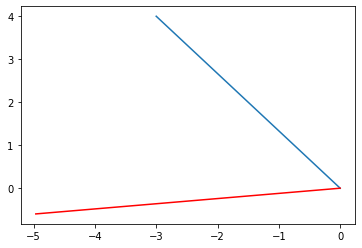

In [48]:
plt.plot(
    A[:, 0], A[:, 1], '-',
    A2[:, 0], A2[:, 1], 'r-'
)

plt.show()

### Matriz de reflexión de Householder

Está dada por: $$R_{H} = I - 2 \frac{uu^T}{u^Tu}$$ con $u \in \mathbb{R}^n -\{0\}$ y realiza la reflexión respecto al conjunto de vectores ortogonales a $u$. 

- En el numerador estamos viendo que se hace el producto externo. Da como resultado una matriz

- El denominador da un vector

- El resultado de la operación es una matriz

**(Tarea) Ejercicio: reflejar al vector $\left(\begin{array}{c}
1\\
1\\
\end{array}
\right)$ utilizando al vector $\left(\begin{array}{c}
-\frac{4}{3}\\
\frac{2}{3}\\
\end{array}
\right)$ para construir a $R_{H}$**.

Aquí `u` será igual -4/3, 2/3

## Base ortogonal, ortonormal

Un conjunto de vectores que forma una base de un espacio vectorial que además es un conjunto ortogonal se le nombra base ortogonal. Si adicionalmente cada vector tiene norma igual a 1 entonces es una base ortonormal.

# Espacio nulo, espacio nulo izquierdo, imagen de una matriz, espacio renglón y espacio columna

En lo siguiente se considera $A \in \mathbb{R}^{mxn}$.

## Espacio nulo

$\mathcal{N}(A) = \{x \in \mathbb{R}^n : Ax =0\}$

**Obs:** es un subespacio de $\mathbb{R}^n$.

**La dimensión de $\mathcal{N}(A)$ se le nombra nulidad.** Si $\mathcal{N}(A)$ sólo contiene al vector $0$, esto es: $\mathcal{N}(A) = \{0\}$ entonces la nulidad de $\mathcal{N}(A)$ es igual a 0.

## Espacio nulo izquierdo

$\mathcal{N}(A^T) = \{x \in \mathbb{R}^m : A^Tx =0\}$

**Obs:** es un subespacio de $\mathbb{R}^m$.

## Imagen de una matriz

$Im(A) = \{y \in \mathbb{R}^m: y=Ax \text{ para alguna } x \in \mathbb{R}^n\}$

Multiplicación de la matriz $A$ por por todos los vectores

**Obs:** es un subespacio de $\mathbb{R}^m$.

**La dimensión de $Im(A)$ se le nombra $rank$**.

## Espacio renglón y espacio columna de una matriz

El espacio renglón es el conjunto generado por los renglones de $A$ y el espacio columna es el conjunto generado por las columnas de $A$.

**Obs:** se prueba que el espacio renglón y el espacio columna son iguales a la imagen de la matriz en cuestión y la dimensión de los mismos es igual al *rank*. 

# Transformaciones lineales

Sean $V$ y $W$ espacios vectoriales con campo en $\mathbb{R}$ entonces una transformación lineal $T$ de $V$ en $W$, denotada por $T: V \rightarrow W$, es una función que asigna a cada vector $v \in V$ un vector único $T(v) \in W$ y que satisface para cada $u,v \in V$ y cada escalar $\alpha \in \mathbb{R}$:



$$
T(u+v)=T(u)+T(v)
$$


$$
T(\alpha v)=\alpha T(v)
$$

**Ejemplos:**

* $T\left(\begin{array}{c}
x\\
y\\
\end{array}
\right) = \left(\begin{array}{c}
x+y\\
x-y\\
3y
\end{array}
\right)$

* $T\left(\begin{array}{c}
x\\
y\\
\end{array}
\right)= R_{\theta}\left(\begin{array}{c}
x\\
y\\
\end{array}
\right)
$ con $R_{\theta}$ matriz de rotación se conoce como transformación de rotación.

* $T\left(\begin{array}{c}
x\\
y\\
\end{array}
\right)= \left(\begin{array}{c}
-x\\
y\\
\end{array}
\right)
$ la cual es una transformación de reflexión respecto al eje vertical en el plano.

## Núcleo e imagen de las transformaciones lineales

Se consideran $V, W$ espacios vectoriales y $T: V \rightarrow W$ una transformación lineal. 

### Núcleo o kernel

Se denota por $nu(T)$ y está dado por $nu(T) = \{v \in V : T(v) = 0\}$.

**Obs:** este conjunto no es vacío pues $T(0) = 0$ por lo que $0 \in nu(T)$. Además es un subespacio vectorial de $V$ y su dimensión se nombra *nulidad* de $T$.

### Imagen

Se denota por $im(T)$ y está dado por $im(T) = \{w \in W : w = T(v) \text{ para alguna } v \in V\}$.

**Obs:** es un subespacio vectorial de $W$ y su dimensión se nombra *rank* de T.

### Representación matricial de una transformación lineal

Sea $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ una transformación lineal. Existe entonces una matriz única de $mxn$, $A$ tal que: $T(x) = Ax \quad \forall x \in \mathbb{R}^n$.

**Obs:** la matriz $A$ del resultado depende de las bases elegidas en $\mathbb{R}^n, \mathbb{R}^m$.

**(Tarea) Ejercicio: para reforzar esta serie de definiciones deben elegir dos ejercicios por cada definición anterior del libro "Álgebra Lineal" de S. Grossman y J. Flores, capítulos 5 y 7**.